# Customer Churn Prediction with Machine Learning - Progress Report

**Course**: CS 5393 - Introduction to Machine Learning  
**Student**: Yaw Boateng  
**Date**: November 8, 2025


## 1. Progress Update Summary

### Work Completed So Far

I have made significant progress on the customer churn prediction project. The work completed includes:

1. **Dataset Acquisition and Initial Exploration**: Successfully loaded and examined the bank customer churn dataset containing 10,000 records with 14 features.

2. **Comprehensive Data Analysis**: Conducted exploratory data analysis including:
   - Summary statistics for all numerical and categorical variables
   - Frequency distribution visualizations for all attributes
   - Boxplot analysis to identify outliers
   - Initial insights about data quality and characteristics

3. **Machine Learning Task Definition**: Clearly defined the regression task for predicting churn probability.

4. **Algorithm Selection**: Identified and justified five machine learning algorithms for comparison:
   - Linear Regression
   - K-Nearest Neighbors (KNN)
   - Support Vector Regression (SVR)
   - Random Forest Regressor
   - XGBoost Regressor

5. **Data Preprocessing Planning**: Outlined comprehensive preprocessing steps including handling missing values, encoding categorical variables, and feature scaling.

6. **Performance Evaluation Framework**: Established evaluation metrics (RMSE, MAE, R²) and cross-validation strategy.

### Project Status: **On Schedule**

I am currently on schedule with the project timeline. The data exploration phase has been completed, and I am ready to proceed with model implementaion and training. The initial analysis has provided valuable insights into the dataset structure and has informed the preprocessing strategy. All planned milestones for this phase have been met, and I am prepared to move forward twith model development in the next phase.


## 2. Key Project Milestones

### 2.1 Dataset Selection and Exploration


#### Dataset Information

**Dataset**: Bank Customer Churn Dataset  
**Source**: Kaggle (https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers)  
**Size**: 10,000 customer records  
**Features**: 14 columns (13 independent variables + 1 target variable)

The dataset contains real-world banking customer data including demographic information, account details, and churn status.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('churn.csv')

# Display basic information about the dataset
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]:,}")
print(f"Number of Columns: {df.shape[1]}")
print(f"\nColumn Names:")
print(df.columns.tolist())
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes)
print("\n" + "=" * 60)
print("FIRST FEW ROWS")
print("=" * 60)
df.head()


DATASET OVERVIEW

Dataset Shape: (10000, 14)
Number of Rows: 10,000
Number of Columns: 14

Column Names:
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

DATA TYPES
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

FIRST FEW ROWS


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset!")
    
print("\n" + "=" * 60)
print("DUPLICATE ROWS CHECK")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")


MISSING VALUES CHECK
No missing values found in the dataset!

DUPLICATE ROWS CHECK
Number of duplicate rows: 0


#### Summary Statistics for Each Variable


In [3]:
# Summary statistics for numerical variables
print("=" * 60)
print("SUMMARY STATISTICS - NUMERICAL VARIABLES")
print("=" * 60)
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_cols].describe()


SUMMARY STATISTICS - NUMERICAL VARIABLES


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [4]:
# Summary statistics for categorical variables
print("=" * 60)
print("SUMMARY STATISTICS - CATEGORICAL VARIABLES")
print("=" * 60)
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")
    print("-" * 40)


SUMMARY STATISTICS - CATEGORICAL VARIABLES

Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Unique values: 3
----------------------------------------

Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Unique values: 2
----------------------------------------

HasCrCard:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
Unique values: 2
----------------------------------------

IsActiveMember:
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Unique values: 2
----------------------------------------

Exited:
Exited
0    7963
1    2037
Name: count, dtype: int64
Unique values: 2
----------------------------------------


#### Frequency Distribution Visualizations


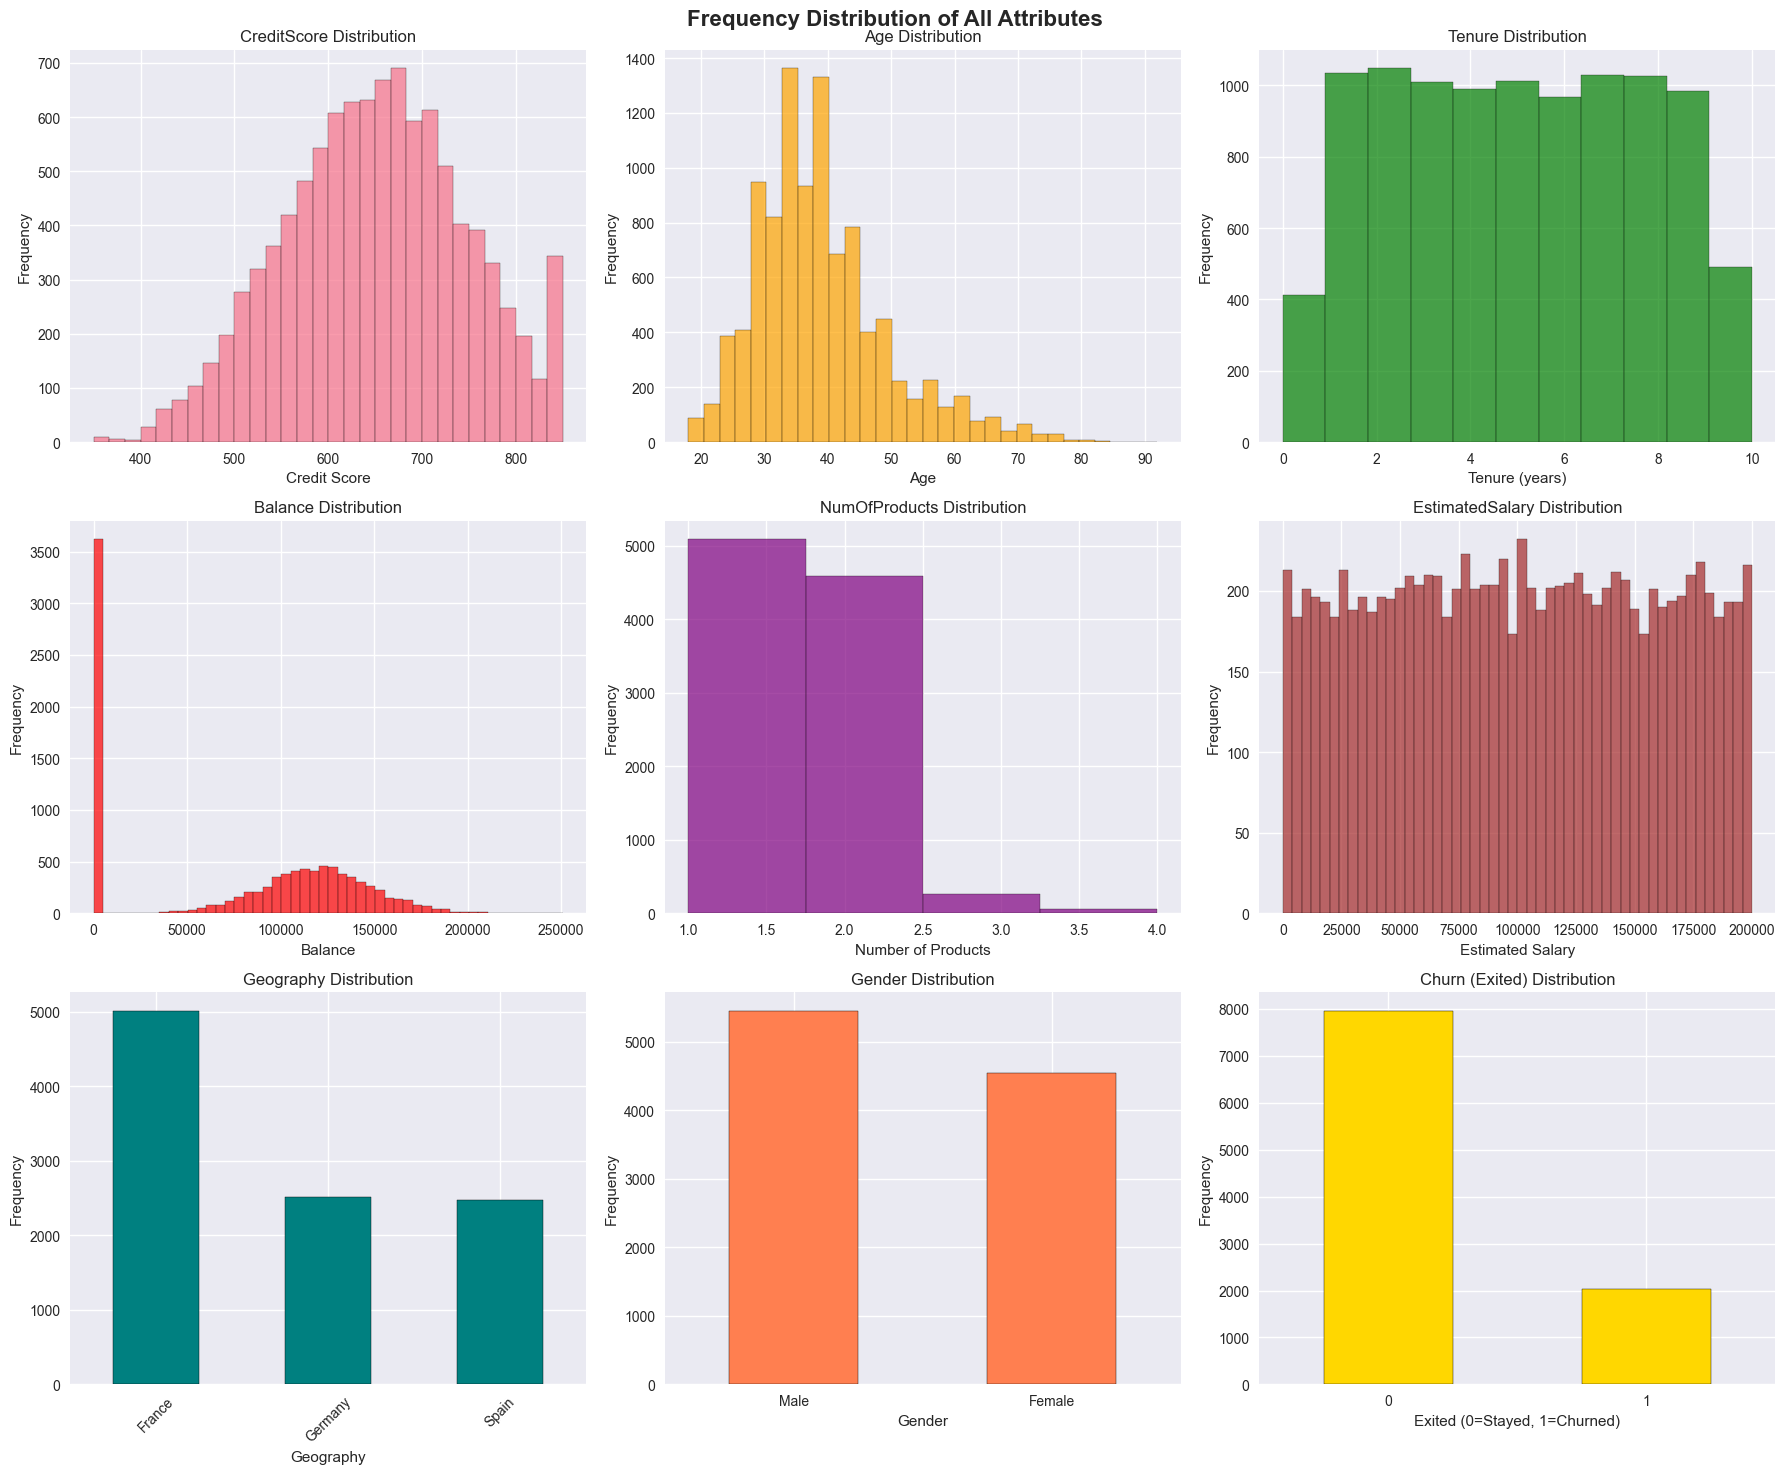

In [5]:
# Create frequency distribution plots for all attributes
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Frequency Distribution of All Attributes', fontsize=16, fontweight='bold')

# Numerical variables - histograms
axes[0, 0].hist(df['CreditScore'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('CreditScore Distribution')
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['Age'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(df['Tenure'], bins=11, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_title('Tenure Distribution')
axes[0, 2].set_xlabel('Tenure (years)')
axes[0, 2].set_ylabel('Frequency')

axes[1, 0].hist(df['Balance'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 0].set_title('Balance Distribution')
axes[1, 0].set_xlabel('Balance')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['NumOfProducts'], bins=4, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('NumOfProducts Distribution')
axes[1, 1].set_xlabel('Number of Products')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].hist(df['EstimatedSalary'], bins=50, edgecolor='black', alpha=0.7, color='brown')
axes[1, 2].set_title('EstimatedSalary Distribution')
axes[1, 2].set_xlabel('Estimated Salary')
axes[1, 2].set_ylabel('Frequency')

# Categorical variables - bar plots
df['Geography'].value_counts().plot(kind='bar', ax=axes[2, 0], color='teal', edgecolor='black')
axes[2, 0].set_title('Geography Distribution')
axes[2, 0].set_xlabel('Geography')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].tick_params(axis='x', rotation=45)

df['Gender'].value_counts().plot(kind='bar', ax=axes[2, 1], color='coral', edgecolor='black')
axes[2, 1].set_title('Gender Distribution')
axes[2, 1].set_xlabel('Gender')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].tick_params(axis='x', rotation=0)

df['Exited'].value_counts().plot(kind='bar', ax=axes[2, 2], color='gold', edgecolor='black')
axes[2, 2].set_title('Churn (Exited) Distribution')
axes[2, 2].set_xlabel('Exited (0=Stayed, 1=Churned)')
axes[2, 2].set_ylabel('Frequency')
axes[2, 2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


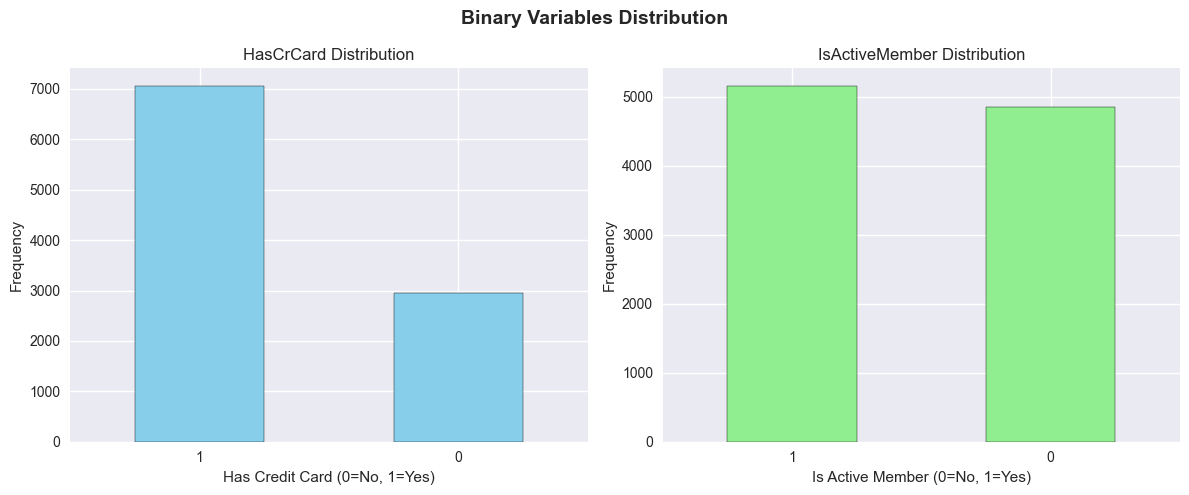

In [6]:
# Additional frequency plots for binary variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Binary Variables Distribution', fontsize=14, fontweight='bold')

df['HasCrCard'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('HasCrCard Distribution')
axes[0].set_xlabel('Has Credit Card (0=No, 1=Yes)')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=0)

df['IsActiveMember'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('IsActiveMember Distribution')
axes[1].set_xlabel('Is Active Member (0=No, 1=Yes)')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


#### Boxplot Analysis for Outlier Detection


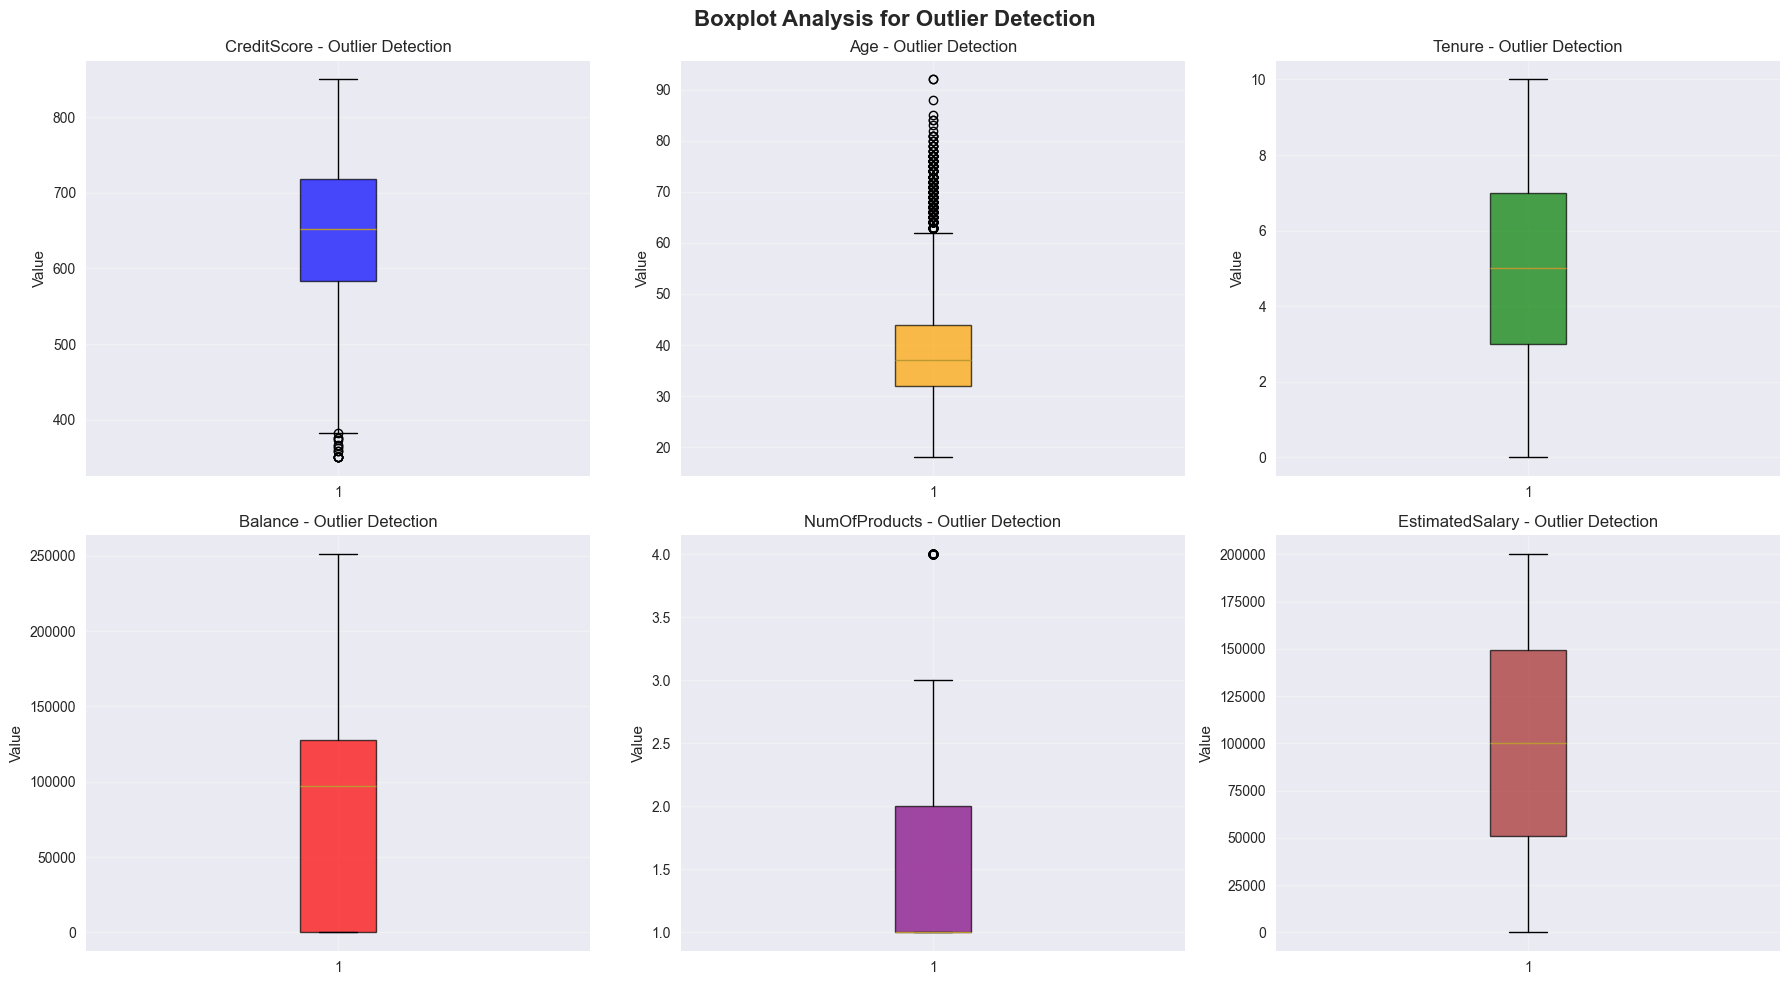

In [7]:
# Create boxplots for all numerical variables to identify outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplot Analysis for Outlier Detection', fontsize=16, fontweight='bold')

numerical_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for idx, (var, color) in enumerate(zip(numerical_vars, colors)):
    row = idx // 3
    col = idx % 3
    bp = axes[row, col].boxplot(df[var], patch_artist=True, vert=True)
    bp['boxes'][0].set_facecolor(color)
    bp['boxes'][0].set_alpha(0.7)
    axes[row, col].set_title(f'{var} - Outlier Detection')
    axes[row, col].set_ylabel('Value')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
# Quantitative outlier analysis using IQR method
print("=" * 60)
print("OUTLIER ANALYSIS USING IQR METHOD")
print("=" * 60)

for var in numerical_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"\n{var}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")


OUTLIER ANALYSIS USING IQR METHOD

CreditScore:
  Q1: 584.00, Q3: 718.00, IQR: 134.00
  Lower bound: 383.00, Upper bound: 919.00
  Number of outliers: 15 (0.15%)

Age:
  Q1: 32.00, Q3: 44.00, IQR: 12.00
  Lower bound: 14.00, Upper bound: 62.00
  Number of outliers: 359 (3.59%)

Tenure:
  Q1: 3.00, Q3: 7.00, IQR: 4.00
  Lower bound: -3.00, Upper bound: 13.00
  Number of outliers: 0 (0.00%)

Balance:
  Q1: 0.00, Q3: 127644.24, IQR: 127644.24
  Lower bound: -191466.36, Upper bound: 319110.60
  Number of outliers: 0 (0.00%)

NumOfProducts:
  Q1: 1.00, Q3: 2.00, IQR: 1.00
  Lower bound: -0.50, Upper bound: 3.50
  Number of outliers: 60 (0.60%)

EstimatedSalary:
  Q1: 51002.11, Q3: 149388.25, IQR: 98386.14
  Lower bound: -96577.10, Upper bound: 296967.45
  Number of outliers: 0 (0.00%)


#### Other Interesting Findings About the Dataset

**Key Insights:**

1. **Class Imbalance**: The target variable (Exited) shows some imbalance with approximately 20% of customers having churned, which is typical for churn prediction problems.

2. **Geographic Distribution**: The dataset contains customers from three countries (France, Germany, Spain) with France having the largest representation.

3. **Balance Distribution**: A significant portion of customers (approximately 30-40%) have zero balance, which may be an important feature for churn prediction.

4. **Age Range**: The age distribution shows customers ranging from 18 to 92 years, with most customers in their 30s and 40s.

5. **Credit Score**: Credit scores range from 350 to 850, with a relatively normal distribution centered around 650.

6. **Tenure**: Customer tenure ranges from 0 to 10 years, with a fairly uniform distribution.

7. **Product Usage**: Most customers use 1-2 products, with very few using 3 or 4 products.

8. **Active Membership**: Approximately half of the customers are active members, which could be a significant predictor of churn.

9. **No Missing Values**: The dataset is complete with no missing values, which simplifies preprocessing.

10. **Salary Distribution**: Estimated salaries are uniformly distributed across the range, which is expected for this type of dataset.


In [ ]:
# Additional analysis: Churn rate by different categories
print("=" * 60)
print("CHURN RATE ANALYSIS BY CATEGORIES")
print("=" * 60)

print("\nChurn Rate by Geography:")
print(df.groupby('Geography')['Exited'].agg(['count', 'sum', 'mean']).round(3))

print("\nChurn Rate by Gender:")
print(df.groupby('Gender')['Exited'].agg(['count', 'sum', 'mean']).round(3))

print("\nChurn Rate by HasCrCard:")
print(df.groupby('HasCrCard')['Exited'].agg(['count', 'sum', 'mean']).round(3))

print("\nChurn Rate by IsActiveMember:")
print(df.groupby('IsActiveMember')['Exited'].agg(['count', 'sum', 'mean']).round(3))

print("\nOverall Churn Rate:")
print(f"Total customers: {len(df)}")
print(f"Churned customers: {df['Exited'].sum()}")
print(f"Churn rate: {df['Exited'].mean():.3f} ({df['Exited'].mean()*100:.1f}%)")


CHURN RATE ANALYSIS BY CATEGORIES

Churn Rate by Geography:
           count  sum   mean
Geography                   
France      5014  810  0.162
Germany     2509  814  0.324
Spain       2477  413  0.167

Churn Rate by Gender:
        count   sum   mean
Gender                    
Female   4543  1139  0.251
Male     5457   898  0.165

Churn Rate by HasCrCard:
           count   sum   mean
HasCrCard                    
0           2945   613  0.208
1           7055  1424  0.202

Churn Rate by IsActiveMember:
                count   sum   mean
IsActiveMember                    
0                4849  1302  0.269
1                5151   735  0.143

Overall Churn Rate:
Total customers: 10000
Churned customers: 2037
Churn rate: 0.204 (20.4%)


### 2.2 Machine Learning Tasks

#### Task Definition

**Primary Machine Learning Task: Regression**

The main task is to predict customer churn probability as a continuous value between 0 and 1 using regression techniques. This is a **supervised learning regression problem** where:

- **Input (X)**: Customer features including CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, and EstimatedSalary
- **Output (y)**: Churn probability (continuous value from 0 to 1)
- **Objective**: Minimize prediction error for churn probability estimation

#### Why This Task is Necessary

1. **Business Value**: Predicting churn probability allows banks to:
   - Prioritize retention efforts based on risk scores
   - Allocate resources more efficiently
   - Implement targeted intervention strategies
   - Estimate potential revenue loss from churn

2. **Risk Stratification**: Continuous probability scores enable better customer segmentation:
   - High-risk customers (probability > 0.7) require immediate attention
   - Medium-risk customers (0.3 < probability < 0.7) need monitoring
   - Low-risk customers (probability < 0.3) require minimal intervention

3. **Model Flexibility**: Regression models provide probabilistic outputs that can be:
   - Thresholded for binary classification decisions
   - Used for ranking customers by churn risk
   - Integrated into business decision-making processes

4. **Interpretability**: Regression models, especially linear models, provide interpretable coefficients that help understand which factors most influence churn probability.


### 2.3 Algorithm Selection

I have selected **five machine learning algorithms** to compare and find the best model for customer churn prediction:

#### 1. Linear Regression
- **Type**: Linear model
- **Rationale**: Serves as a baseline model for comparison. Fast training, highly interpretable, and provides a good starting point to understand linear relationships between features and churn probability.

#### 2. K-Nearest Neighbors (KNN) Regressor
- **Type**: Instance-based, non-parametric
- **Rationale**: Captures local patterns in the data without assuming a specific functional form. Good for identifying similar customer groups and their churn probabilities. Sensitive to feature scaling, which will be addressed in preprocessing.

#### 3. Support Vector Regression (SVR)
- **Type**: Kernel-based method
- **Rationale**: Effective for capturing non-linear relationships through kernel functions (RBF, polynomial). Robust to outliers and can handle complex feature interactions. Good for cases where linear models may be insufficient.

#### 4. Random Forest Regressor
- **Type**: Ensemble method (bagging)
- **Rationale**: Combines multiple decision trees to reduce overfitting and improve generalization. Handles non-linear relationships and feature interactions naturally. Provides feature importance rankings for business insights. Less sensitive to outliers than linear models.

#### 5. XGBoost Regressor
- **Type**: Ensemble method (gradient boosting)
- **Rationale**: State-of-the-art performance for many regression tasks. Built-in regularization prevents overfitting. Handles missing values and provides feature importance. Often achieves superior performance compared to other algorithms.

#### Justification for Algorithm Selection

These algorithms were chosen because they:

1. **Cover Different Learning Paradigms**: Linear, instance-based, kernel-based, and ensemble methods provide diverse approaches to the problem.

2. **Complementary Strengths**: Each algorithm has unique strengths:
   - Linear Regression: Interpretability and speed
   - KNN: Local pattern recognition
   - SVR: Non-linear relationships with kernels
   - Random Forest: Robustness and feature importance
   - XGBoost: High predictive performance

3. **Suitability for Regression**: All selected algorithms are well-suited for regression tasks and can predict continuous probability values.

4. **Industry Standard**: These are widely used in production systems for churn prediction and similar business problems.

5. **Scalability**: All algorithms can handle datasets of this size (10,000 records) efficiently.


### 2.4 Data Preprocessing

The following data preprocessing steps will be applied before running the selected algorithms:

#### 1. Feature Removal
- **Remove irrelevant features**: `RowNumber`, `CustomerId`, and `Surname` will be removed as they are identifiers and do not contribute to predictive power.

#### 2. Handling Missing Data
- **Status**: The dataset has been checked and contains **no missing values**, so no imputation is required.
- **Strategy**: If missing values were present, we would use:
  - Mean/median imputation for numerical variables
  - Mode imputation for categorical variables
  - Or advanced techniques like KNN imputation if needed

#### 3. Encoding Categorical Variables
- **One-Hot Encoding**: Apply to `Geography` (3 categories: France, Germany, Spain) and `Gender` (2 categories: Male, Female)
  - Creates binary columns for each category
  - Prevents ordinal assumptions that don't exist in the data
- **Binary Variables**: `HasCrCard` and `IsActiveMember` are already binary (0/1) and require no encoding

#### 4. Feature Scaling/Normalization
- **StandardScaler**: Apply to all numerical features (CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary)
  - Transforms features to have mean=0 and standard deviation=1
  - Essential for distance-based algorithms (KNN, SVR)
  - Improves convergence for gradient-based methods
  - Does not affect tree-based methods (Random Forest, XGBoost) but applied for consistency

#### 5. Outlier Treatment
- **Analysis**: Boxplot and IQR analysis have identified outliers in several numerical features
- **Strategy**: 
  - For tree-based methods (Random Forest, XGBoost): Outliers can be retained as they are naturally handled
  - For linear methods (Linear Regression, SVR): Consider capping outliers at 1.5×IQR bounds or using robust scaling
  - Domain knowledge will guide final decisions (e.g., very high credit scores are valid)

#### 6. Feature Engineering (Planned)
- **Interaction Features**: Create features like Age × Balance, Tenure × NumOfProducts
- **Binning**: Consider binning Age or CreditScore into categories if it improves model performance
- **Polynomial Features**: May create polynomial features for linear models if needed

#### 7. Data Splitting
- **Train/Validation/Test Split**: 70% / 15% / 15%
- **Stratified Sampling**: Ensure churn distribution is maintained across splits
- **Cross-Validation**: Use 5-fold cross-validation for robust model evaluation

#### 8. Target Variable
- **No Transformation Needed**: The target variable `Exited` is already binary (0/1) and will be used directly as the regression target (churn probability)


In [ ]:
# Demonstrate preprocessing steps (preparation phase)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Create a copy for preprocessing demonstration
df_preprocessed = df.copy()

# Remove irrelevant features
features_to_remove = ['RowNumber', 'CustomerId', 'Surname']
df_preprocessed = df_preprocessed.drop(columns=features_to_remove)

print("=" * 60)
print("PREPROCESSING PREPARATION")
print("=" * 60)
print(f"\nOriginal shape: {df.shape}")
print(f"After removing identifiers: {df_preprocessed.shape}")
print(f"\nRemaining features: {df_preprocessed.columns.tolist()}")

# Identify feature types
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']
binary_features = ['HasCrCard', 'IsActiveMember']
target = 'Exited'

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")
print(f"Binary features: {binary_features}")
print(f"Target variable: {target}")


PREPROCESSING PREPARATION

Original shape: (10000, 14)
After removing identifiers: (10000, 11)

Remaining features: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Numerical features: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Categorical features: ['Geography', 'Gender']
Binary features: ['HasCrCard', 'IsActiveMember']
Target variable: Exited


### 2.5 Performance Evaluation

#### Evaluation Metrics

The performance of the regression models will be assessed using the following metrics:

1. **Root Mean Square Error (RMSE)**
   - **Primary Metric**: RMSE will be the main metric for model comparison
   - **Rationale**: Penalizes large errors more heavily, which is important for identifying high-risk customers
   - **Interpretation**: Lower RMSE indicates better model performance
   - **Formula**: RMSE = √(Σ(y_pred - y_true)² / n)

2. **Mean Absolute Error (MAE)**
   - **Secondary Metric**: Provides interpretable average prediction error
   - **Rationale**: Robust to outliers and easy to understand (average difference between predicted and actual churn probability)
   - **Interpretation**: Lower MAE indicates better performance
   - **Formula**: MAE = Σ|y_pred - y_true| / n

3. **R² Score (Coefficient of Determination)**
   - **Secondary Metric**: Measures proportion of variance explained
   - **Rationale**: Provides insight into how well the model explains the variability in churn probability
   - **Interpretation**: Higher R² (closer to 1.0) indicates better fit
   - **Formula**: R² = 1 - (SS_res / SS_tot)

4. **Cross-Validation Score**
   - **Method**: 5-fold cross-validation
   - **Rationale**: Provides robust performance estimates by evaluating models on multiple train/test splits
   - **Benefit**: Reduces overfitting risk and provides confidence intervals for performance metrics

#### Model Comparison Criteria

The best model will be determined based on:

1. **Primary Criterion**: Lowest RMSE on validation/test set
2. **Secondary Criteria**:
   - Lowest MAE
   - Highest R² Score
   - Consistent performance across cross-validation folds (low variance)
   - Generalization ability (similar performance on train and test sets)

3. **Additional Considerations**:
   - Model interpretability (for business stakeholders)
   - Training time and inference speed
   - Feature importance insights

#### Evaluation Strategy

1. **Train-Validation-Test Split**: 
   - 70% training, 15% validation, 15% test
   - Validation set used for hyperparameter tuning
   - Test set used only for final model evaluation

2. **Cross-Validation**:
   - 5-fold cross-validation on training set
   - Provides robust performance estimates
   - Helps identify overfitting

3. **Learning Curves**:
   - Plot training and validation error vs. training set size
   - Identify bias-variance tradeoff
   - Determine if more data would help

4. **Residual Analysis**:
   - Plot residuals vs. predicted values
   - Check for patterns indicating model inadequacy
   - Verify assumptions (normality, homoscedasticity)

#### Justification for Evaluation Approach

This comprehensive evaluation strategy ensures:
- **Robustness**: Multiple metrics and cross-validation prevent overfitting to a single metric
- **Reliability**: Test set provides unbiased final performance estimate
- **Interpretability**: Multiple metrics help understand different aspects of model performance
- **Business Relevance**: RMSE and MAE are interpretable for business stakeholders


## 3. Work to be Done

### Remaining Tasks and Timeline

The following tasks need to be completed to conclude the project:

#### Task 1: Complete Data Preprocessing Implementation
- **Description**: Implement all preprocessing steps including one-hot encoding, feature scaling, and data splitting
- **Deliverables**: 
  - Preprocessed training, validation, and test datasets
  - Preprocessing pipeline using sklearn Pipeline
  - Documentation of preprocessing steps
- **Start Date**: November 9, 2025
- **End Date**: November 12, 2025
- **Duration**: 4 days
- **Status**: In Progress

#### Task 2: Implement and Train All Five Models
- **Description**: Implement Linear Regression, KNN, SVR, Random Forest, and XGBoost models
- **Deliverables**:
  - Trained models for all five algorithms
  - Initial performance metrics on validation set
  - Model comparison table
- **Start Date**: November 13, 2025
- **End Date**: November 18, 2025
- **Duration**: 6 days
- **Status**: Pending

#### Task 3: Hyperparameter Tuning
- **Description**: Optimize hyperparameters for each model using GridSearchCV or RandomizedSearchCV
- **Deliverables**:
  - Optimized hyperparameters for each model
  - Performance improvement documentation
  - Hyperparameter tuning results
- **Start Date**: November 19, 2025
- **End Date**: November 23, 2025
- **Duration**: 5 days
- **Status**: Pending

#### Task 4: Model Evaluation and Comparison
- **Description**: Comprehensive evaluation of all models using RMSE, MAE, R², and cross-validation
- **Deliverables**:
  - Performance comparison table
  - Learning curves for all models
  - Residual analysis plots
  - Feature importance analysis
  - Statistical significance testing
- **Start Date**: November 24, 2025
- **End Date**: November 27, 2025
- **Duration**: 4 days
- **Status**: Pending

#### Task 5: Select Best Model and Final Evaluation
- **Description**: Select best-performing model based on evaluation criteria and perform final test set evaluation
- **Deliverables**:
  - Best model selection with justification
  - Final test set performance metrics
  - Model interpretation and business insights
- **Start Date**: November 28, 2025
- **End Date**: November 30, 2025
- **Duration**: 3 days
- **Status**: Pending

#### Task 6: Web Application Development
- **Description**: Build interactive web application for real-time churn probability prediction
- **Deliverables**:
  - Flask/Streamlit web application
  - User interface for inputting customer data
  - Real-time prediction functionality
  - Visualization of predictions and feature contributions
- **Start Date**: December 1, 2025
- **End Date**: December 5, 2025
- **Duration**: 5 days
- **Status**: Pending

#### Task 7: Final Documentation and Report
- **Description**: Complete final project report with all results, visualizations, and conclusions
- **Deliverables**:
  - Comprehensive final report
  - All code documentation
  - Presentation materials
  - Project summary
- **Start Date**: December 6, 2025
- **End Date**: December 9, 2025
- **Duration**: 4 days
- **Status**: Pending

### Project Timeline Summary

| Task | Start Date | End Date | Duration | Status |
|------|-----------|----------|----------|--------|
| Data Preprocessing | Nov 9 | Nov 12 | 4 days | In Progress |
| Model Implementation | Nov 13 | Nov 18 | 6 days | Pending |
| Hyperparameter Tuning | Nov 19 | Nov 23 | 5 days | Pending |
| Model Evaluation | Nov 24 | Nov 27 | 4 days | Pending |
| Best Model Selection | Nov 28 | Nov 30 | 3 days | Pending |
| Web Application | Dec 1 | Dec 5 | 5 days | Pending |
| Final Documentation | Dec 6 | Dec 9 | 4 days | Pending |

**Total Remaining Duration**: 31 days  
**Project Completion Date**: December 9, 2025


## 4. References

1. Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*, 785-794. https://doi.org/10.1145/2939672.2939785

2. Breiman, L. (2001). Random Forests. *Machine Learning*, 45(1), 5-32. https://doi.org/10.1023/A:1010933404324

3. Cortes, C., & Vapnik, V. (1995). Support-Vector Networks. *Machine Learning*, 20(3), 273-297. https://doi.org/10.1023/A:1022627411411

4. Cover, T., & Hart, P. (1967). Nearest Neighbor Pattern Classification. *IEEE Transactions on Information Theory*, 13(1), 21-27. https://doi.org/10.1109/TIT.1967.1053964


5. Kaggle. (n.d.). *Bank Customer Churn Dataset*. Retrieved November 8, 2025, from https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers


6. Provost, F., & Fawcett, T. (2013). *Data Science for Business: What You Need to Know About Data Mining and Data-Analytic Thinking*. O'Reilly Media.

7. Scikit-learn Developers. (2023). *Scikit-learn User Guide*. Retrieved November 8, 2025, from https://scikit-learn.org/stable/user_guide.html

8. Verbraken, T., Verbeke, W., & Baesens, B. (2013). A Novel Profit-Based Metric for Classifier Selection and Customer Base Analysis. *IEEE Transactions on Knowledge and Data Engineering*, 25(5), 1060-1073. https://doi.org/10.1109/TKDE.2012.49
